In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


###Function

In [2]:
!pip install imbalanced-learn

from imblearn.over_sampling import SMOTE

def balance(X_temp, y_temp):
  smote = SMOTE()
  X_temp, y_temp= smote.fit_resample(X_temp, y_temp)
  return pd.concat([pd.DataFrame(X_temp), pd.DataFrame(y_temp)], axis=1)



def models_check_box(models):
  import ipywidgets as widgets
  from IPython.display import display
  new_keys=[]
  for i in models:
    i=widgets.Checkbox(
      value=False,
      description=str(i),
      disabled=False,
      indent=False
      )
    display(i)
    new_keys.append(i)
  return new_keys

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#Starting

In [3]:
import numpy as np
import pandas as pd
#dataset=pd.read_excel("/content/drive/MyDrive/EEG_CNU_Activity Recognition/EEG_CNU_Resting, walking, working and Reading_Control_2022.12.30_1.xlsx")
dataset=pd.read_excel("/content/drive/MyDrive/Iqram Sir/EEG_CNU_Resting, walking, working and Reading_Control_2022.12.30_1.xlsx")

target = "Activity"
result = {}

In [4]:
dataset.head()

Activity   Status  Epoch  MeanP_Alpha_Fz  MeanP_Beta_Fz  MeanP_Theta_Fz  \
0  Resting  Control      0        0.000008       0.000017        0.000008   
1  Resting  Control      1        0.000010       0.000023        0.000009   
2  Resting  Control      2        0.000008       0.000023        0.000006   
3  Resting  Control      3        0.000011       0.000019        0.000010   
4  Resting  Control      4        0.000007       0.000010        0.000007   

   MeanP_Delta_Fz  MeanP_Gamma_Fz  MeanP_Alpha_T7  MeanP_Beta_T7  ...  \
0        0.000037        0.000006        0.000015       0.000047  ...   
1        0.000064        0.000008        0.000022       0.000059  ...   
2        0.000019        0.000007        0.000018       0.000065  ...   
3        0.000029        0.000006        0.000012       0.000038  ...   
4        0.000010        0.000002        0.000013       0.000028  ...   

   pdBSI_gamma_T   pdBSI_T        DAR       DTR     DTABR  \
0       0.459030  0.214583  12.438393  5.539580  5.283557   
1       0.330678  0.153688   8.122782  5.075034  3.541553   
2       0.401001  0.197538   7.248717  4.694718  2.869184   
3       0.395906  0.157050   8.925147  4.484127  4.446999   
4       0.430493  0.155118  13.888878  5.672066  6.891941   

   Relative Power_Alpha_Global  Relative Power_Beta_Global  \
0                     0.358154                    0.639771   
1                     0.457695                    0.806208   
2                     0.501419                    1.059244   
3                     0.497909                    0.710690   
4                     0.429825                    0.569204   

   Relative Power_Theta_Global  Relative Power_Delta_Global  \
0                     0.749628                     4.031903   
1                     0.723662                     3.759249   
2                     0.737332                     3.320235   
3                     0.907816                     3.653423   
4                     0.849345                     4.001597   

   Relative Power_Gamma_Global  
0                     0.220545  
1                     0.253186  
2                     0.381769  
3                     0.230162  
4                     0.150029  

[5 rows x 89 columns]

In [5]:
dataset.shape

(1711, 89)

In [6]:
dataset[target].value_counts()

Reading    793
Walking    408
Working    267
Resting    243
Name: Activity, dtype: int64

In [7]:
set(list(dataset['Activity']))

{'Reading', 'Resting', 'Walking', 'Working'}

In [8]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
dataset[target]=encoder.fit_transform(dataset[target])

In [9]:
set(list(dataset['Activity']))

{0, 1, 2, 3}

###Spliting into X and y

In [10]:
X =  dataset.loc[:,dataset.columns != target]  # removing Activity 
X =  X.loc[:,X.columns != "Status"]            # removing Status
X =  X.loc[:,X.columns != "Epoch"]             # removing Epoch
y = dataset["Activity"]

X.head(10)

MeanP_Alpha_Fz  MeanP_Beta_Fz  MeanP_Theta_Fz  MeanP_Delta_Fz  \
0        0.000008       0.000017        0.000008        0.000037   
1        0.000010       0.000023        0.000009        0.000064   
2        0.000008       0.000023        0.000006        0.000019   
3        0.000011       0.000019        0.000010        0.000029   
4        0.000007       0.000010        0.000007        0.000010   
5        0.000008       0.000010        0.000007        0.000019   
6        0.000005       0.000007        0.000005        0.000013   
7        0.000005       0.000007        0.000006        0.000023   
8        0.000006       0.000009        0.000006        0.000012   
9        0.000014       0.000021        0.000015        0.000021   

   MeanP_Gamma_Fz  MeanP_Alpha_T7  MeanP_Beta_T7  MeanP_Theta_T7  \
0        0.000006        0.000015       0.000047        0.000016   
1        0.000008        0.000022       0.000059        0.000017   
2        0.000007        0.000018       0.000065        0.000016   
3        0.000006        0.000012       0.000038        0.000012   
4        0.000002        0.000013       0.000028        0.000024   
5        0.000002        0.000013       0.000031        0.000019   
6        0.000002        0.000011       0.000018        0.000024   
7        0.000002        0.000008       0.000022        0.000011   
8        0.000002        0.000018       0.000032        0.000028   
9        0.000004        0.000009       0.000020        0.000010   

   MeanP_Delta_T7  MeanP_Gamma_T7  ...  pdBSI_gamma_T   pdBSI_T        DAR  \
0        0.000094        0.000019  ...       0.459030  0.214583  12.438393   
1        0.000150        0.000021  ...       0.330678  0.153688   8.122782   
2        0.000075        0.000028  ...       0.401001  0.197538   7.248717   
3        0.000120        0.000014  ...       0.395906  0.157050   8.925147   
4        0.000170        0.000010  ...       0.430493  0.155118  13.888878   
5        0.000082        0.000013  ...       0.380013  0.158437   9.159433   
6        0.000170        0.000006  ...       0.221696  0.052372   8.562337   
7        0.000059        0.000008  ...       0.348357  0.114897   8.628646   
8        0.000130        0.000011  ...       0.402960  0.150786  10.083337   
9        0.000044        0.000007  ...       0.386707  0.161905   5.262178   

        DTR     DTABR  Relative Power_Alpha_Global  \
0  5.539580  5.283557                     0.358154   
1  5.075034  3.541553                     0.457695   
2  4.694718  2.869184                     0.501419   
3  4.484127  4.446999                     0.497909   
4  5.672066  6.891941                     0.429825   
5  4.909690  4.405570                     0.494096   
6  5.475070  4.491270                     0.527217   
7  5.287281  3.925721                     0.475599   
8  4.565816  5.384672                     0.482293   
9  2.699725  3.125619                     0.659929   

   Relative Power_Beta_Global  Relative Power_Theta_Global  \
0                    0.639771                     0.749628   
1                    0.806208                     0.723662   
2                    1.059244                     0.737332   
3                    0.710690                     0.907816   
4                    0.569204                     0.849345   
5                    0.687221                     0.812251   
6                    0.668711                     0.770164   
7                    0.719244                     0.764508   
8                    0.620810                     0.933737   
9                    0.855344                     1.188749   

   Relative Power_Delta_Global  Relative Power_Gamma_Global  
0                     4.031903                     0.220545  
1                     3.759249                     0.253186  
2                     3.320235                     0.381769  
3                     3.653423                     0.230162  
4                     4.001597                     0.15002

###USing SMOTE for balancing

In [11]:
new_dataset =  balance(X,y)

In [12]:
new_dataset[target].value_counts()

1    793
2    793
0    793
3    793
Name: Activity, dtype: int64

#Feature Selection

In [13]:
number_of_feat = 30

###ANOVA with f classifciation

In [24]:
from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
import pandas as pd



fs = SelectKBest(score_func=f_classif, k=5)
fit = fs.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)

featureScores.columns = ['Best_columns','Score_ANOVA'] 

lyst = featureScores.nlargest(number_of_feat,'Score_ANOVA')

#lyst.to_csv('Filter_Method_ANOVA_with_f_classif.csv')

list_of_feat = list(lyst["Best_columns"])

###Embedded Method

In [14]:

from sklearn.linear_model import LassoCV
reg = LassoCV()
reg.fit(X, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = X.columns)

print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

imp_coef = coef.sort_values()

list_of_feat=[]


for i in range(coef.shape[0]):
  if coef[i]!=0:
    list_of_feat.append(dataset.iloc[:0,i+3].name)
    
df = pd.DataFrame(list_of_feat, columns=['Best_Features'])

#df.to_csv("Embedded_Method.csv")

list_of_feat = list(df["Best_Features"])
if number_of_feat < len(list_of_feat):
  list_of_feat = list_of_feat[:number_of_feat]

Best alpha using built-in LassoCV: 0.000693
Best score using built-in LassoCV: 0.321220
Lasso picked 30 variables and eliminated the other 56 variables


###Pearson's with f regression

In [ ]:
from sklearn.datasets import make_regression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
import pandas as pd


fs = SelectKBest(score_func=f_regression, k=5)
fit = fs.fit(X,y)

dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(dataset.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)

featureScores.columns = ['Best_columns','Score_pearsons'] 


lyst = featureScores.nlargest(number_of_feat,'Score_pearsons')

#lyst.to_csv('Filter_Method_Pearson’s_with_f_regression.csv')

list_of_feat = list(lyst["Best_columns"])

###Sequential Feature Selection

In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
sfs = SequentialFeatureSelector(knn, n_features_to_select=number_of_feat)
sfs.fit(X, y)
list_of_feat=[]
list_of_feat=list(sfs.get_feature_names_out(X.columns))

df = pd.DataFrame(list_of_feat, columns=['Best_Features'])

#df.to_csv("Filter_Method_Sequential_feat_Selection_KNN.csv")

list_of_feat = list(df["Best_Features"])
if number_of_feat < len(list_of_feat):
  list_of_feat = list_of_feat[:number_of_feat]

KeyboardInterrupt: ignored

###Feature list

In [ ]:
dfcolumns = pd.DataFrame(list_of_feat)
print(dfcolumns)

                              0
0       Relative Power_Theta_T7
1       Relative Power_Gamma_C1
2   Relative Power_Theta_Global
3        Relative Power_Beta_Fz
4    Relative Power_Beta_Global
5       Relative Power_Theta_Oz
6       Relative Power_Theta_C2
7       Relative Power_Theta_T8
8                MeanP_Gamma_C2
9                MeanP_Gamma_T8
10               MeanP_Gamma_Oz
11       Relative Power_Beta_T7
12  Relative Power_Gamma_Global
13                MeanP_Beta_C1
14      Relative Power_Theta_Fz
15               MeanP_Theta_C1
16               MeanP_Alpha_C1
17      Relative Power_Alpha_Fz
18               MeanP_Gamma_Fz
19       Relative Power_Beta_C1
20                pdBSI_alpha_C
21      Relative Power_Gamma_Oz
22      Relative Power_Gamma_C2
23      Relative Power_Gamma_T8
24               Total Power_C1
25      Relative Power_Theta_C1
26                      pdBSI_C
27                pdBSI_gamma_C
28               MeanP_Delta_C1
29               MeanP_Theta_Oz


#Data Spliting

In [15]:
X_new = new_dataset[list_of_feat]
y_new = new_dataset[target]

In [16]:
X_new.shape

(3172, 30)

In [17]:
y_new.shape

(3172,)

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size = 0.2, random_state = 0)



---



# **Training**



---



#ADABOOST

In [19]:
from sklearn.ensemble import AdaBoostClassifier

ada_defult = AdaBoostClassifier(random_state=0)
ada_defult.fit(X_train, y_train)
y_pred = ada_defult.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(ada_defult,1,'AdaBoostClassifier')]=accuracy_score(y_test, y_pred)


[[ 99  28  20  16]
 [ 30  83  13  19]
 [ 36  26  73  33]
 [  7  14  37 101]]
              precision    recall  f1-score   support

           0       0.58      0.61      0.59       163
           1       0.55      0.57      0.56       145
           2       0.51      0.43      0.47       168
           3       0.60      0.64      0.62       159

    accuracy                           0.56       635
   macro avg       0.56      0.56      0.56       635
weighted avg       0.56      0.56      0.56       635

Accurecy:  0.5606299212598426


1/50 round completed......................... Accurecy: 0.37480314960629924
2/50 round completed......................... Accurecy: 0.4047244094488189
3/50 round completed......................... Accurecy: 0.4062992125984252
4/50 round completed......................... Accurecy: 0.4519685039370079
5/50 round completed......................... Accurecy: 0.47086614173228347
6/50 round completed......................... Accurecy: 0.45511811023622045
7/50 round completed......................... Accurecy: 0.4755905511811024
8/50 round completed......................... Accurecy: 0.49606299212598426
9/50 round completed......................... Accurecy: 0.49921259842519683
10/50 round completed......................... Accurecy: 0.49291338582677163
11/50 round completed......................... Accurecy: 0.510236220472441
12/50 round completed......................... Accurecy: 0.49606299212598426
13/50 round completed......................... Accurecy: 0.49763779527559054
14/50 round co

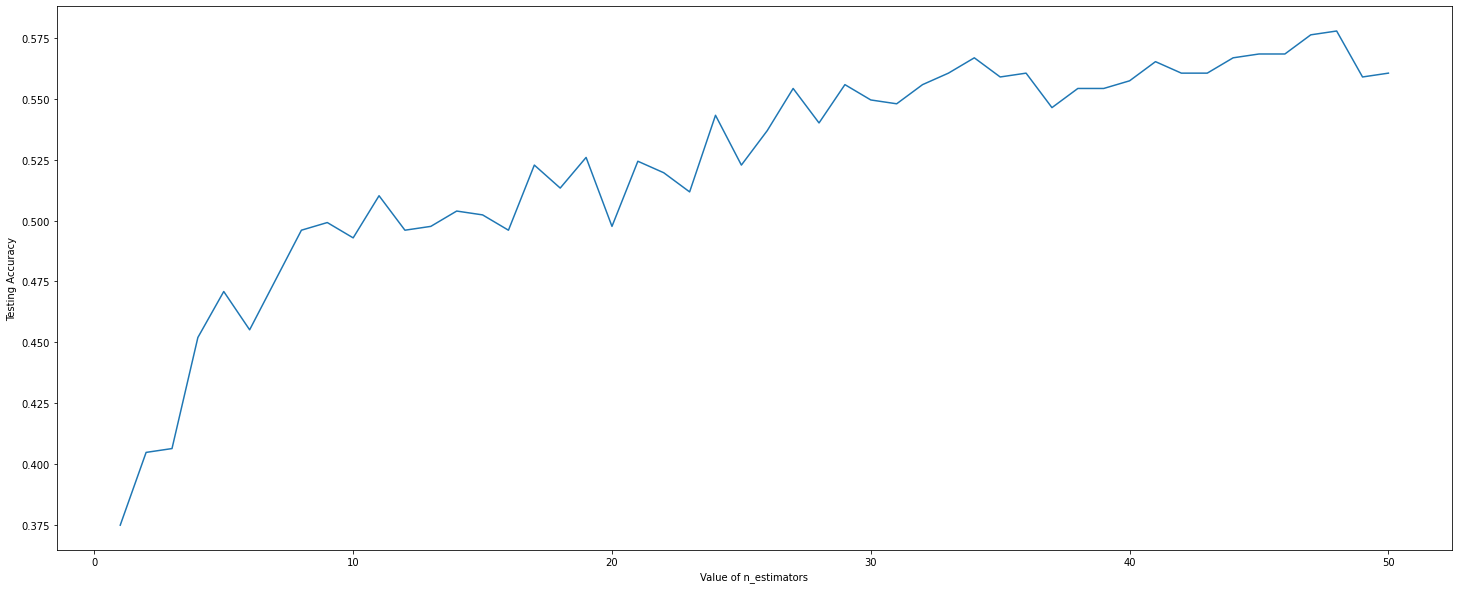

In [20]:
from sklearn.ensemble import AdaBoostClassifier
N=50
k_range = range (1,N+1)
scores={}
scores_list = []
for k in k_range:
  classifier = AdaBoostClassifier(n_estimators=k,random_state=0)
  classifier.fit(X_train, y_train)
  y_pred=classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))



%matplotlib inline
import matplotlib.pyplot as plt
#plot the relationship between K and the testing accuracy
plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best n_estimators:")
best_estimator=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_estimator)

In [21]:
from sklearn.ensemble import AdaBoostClassifier

ada_best_estimator = AdaBoostClassifier(n_estimators=best_estimator,random_state=0)
ada_best_estimator.fit(X_train, y_train)
y_pred = ada_best_estimator.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(ada_best_estimator,1,'AdaBoostClassifier')]=accuracy_score(y_test, y_pred)

[[99 30 23 11]
 [25 87 12 21]
 [32 29 86 21]
 [ 9 15 40 95]]
              precision    recall  f1-score   support

           0       0.60      0.61      0.60       163
           1       0.54      0.60      0.57       145
           2       0.53      0.51      0.52       168
           3       0.64      0.60      0.62       159

    accuracy                           0.58       635
   macro avg       0.58      0.58      0.58       635
weighted avg       0.58      0.58      0.58       635

Accurecy:  0.5779527559055118




---



---



#Graddient Boosting

In [22]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RepeatedStratifiedKFold

gradBoost_default = GradientBoostingClassifier(random_state=0)
gradBoost_default.fit(X_train, y_train)
y_pred = gradBoost_default.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(gradBoost_default,2,'GradientBoostingClassifier')]=accuracy_score(y_test, y_pred)

[[109  23  25   6]
 [ 10 117   8  10]
 [ 22  20 108  18]
 [  7   8  23 121]]
              precision    recall  f1-score   support

           0       0.74      0.67      0.70       163
           1       0.70      0.81      0.75       145
           2       0.66      0.64      0.65       168
           3       0.78      0.76      0.77       159

    accuracy                           0.72       635
   macro avg       0.72      0.72      0.72       635
weighted avg       0.72      0.72      0.72       635

Accurecy:  0.7165354330708661


1/50 round completed......................... Accurecy: 0.5354330708661418
2/50 round completed......................... Accurecy: 0.5417322834645669
3/50 round completed......................... Accurecy: 0.5496062992125984
4/50 round completed......................... Accurecy: 0.5606299212598426
5/50 round completed......................... Accurecy: 0.573228346456693
6/50 round completed......................... Accurecy: 0.5905511811023622
7/50 round completed......................... Accurecy: 0.5905511811023622
8/50 round completed......................... Accurecy: 0.5921259842519685
9/50 round completed......................... Accurecy: 0.5952755905511811
10/50 round completed......................... Accurecy: 0.6047244094488189
11/50 round completed......................... Accurecy: 0.6094488188976378
12/50 round completed......................... Accurecy: 0.6125984251968504
13/50 round completed......................... Accurecy: 0.6188976377952756
14/50 round completed.

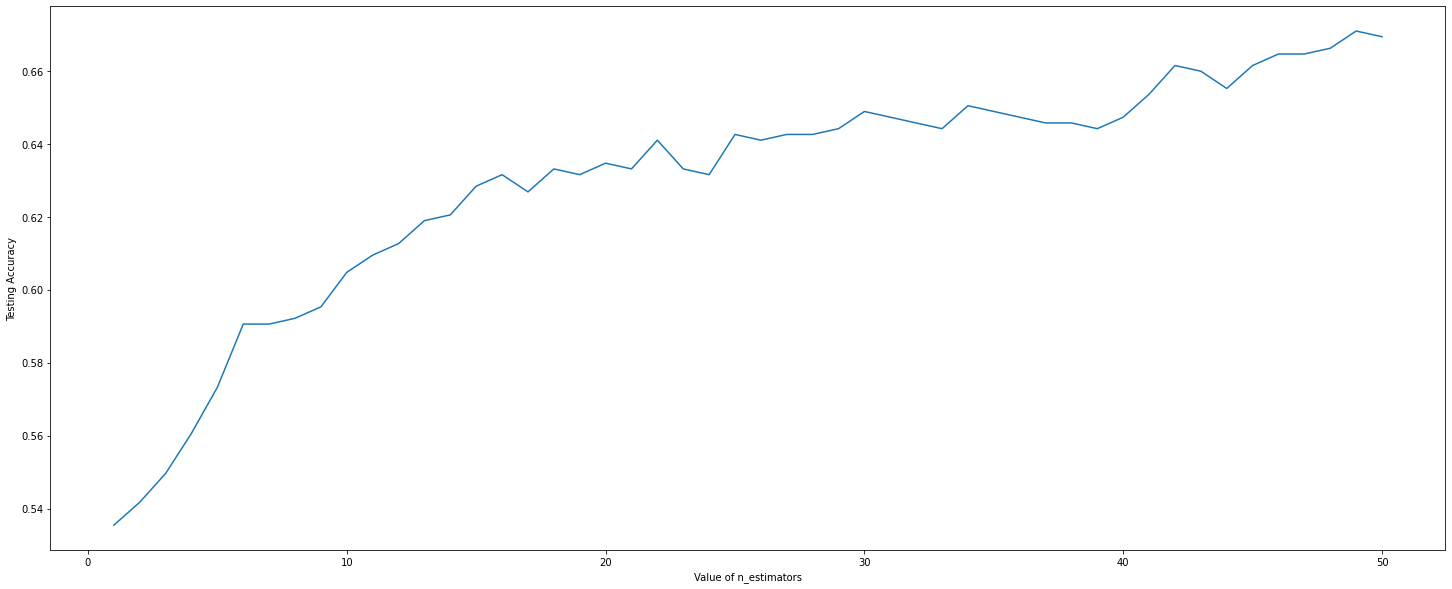

In [23]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
N=50
k_range = range (1,N+1)
scores={}
scores_list = []
for k in k_range:
  classifier = GradientBoostingClassifier(n_estimators=k,random_state=0)
  classifier.fit(X_train, y_train)
  y_pred=classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))



%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best n_estimators:")
best_estimator=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_estimator)

1/14 round completed......................... Accurecy: 0.5858267716535434
2/14 round completed......................... Accurecy: 0.662992125984252
3/14 round completed......................... Accurecy: 0.7165354330708661
4/14 round completed......................... Accurecy: 0.768503937007874
5/14 round completed......................... Accurecy: 0.8
6/14 round completed......................... Accurecy: 0.8141732283464567
7/14 round completed......................... Accurecy: 0.8015748031496063
8/14 round completed......................... Accurecy: 0.8141732283464567
9/14 round completed......................... Accurecy: 0.8
10/14 round completed......................... Accurecy: 0.8015748031496063
11/14 round completed......................... Accurecy: 0.8141732283464567
12/14 round completed......................... Accurecy: 0.8031496062992126
13/14 round completed......................... Accurecy: 0.8
14/14 round completed......................... Accurecy: 0.782677165

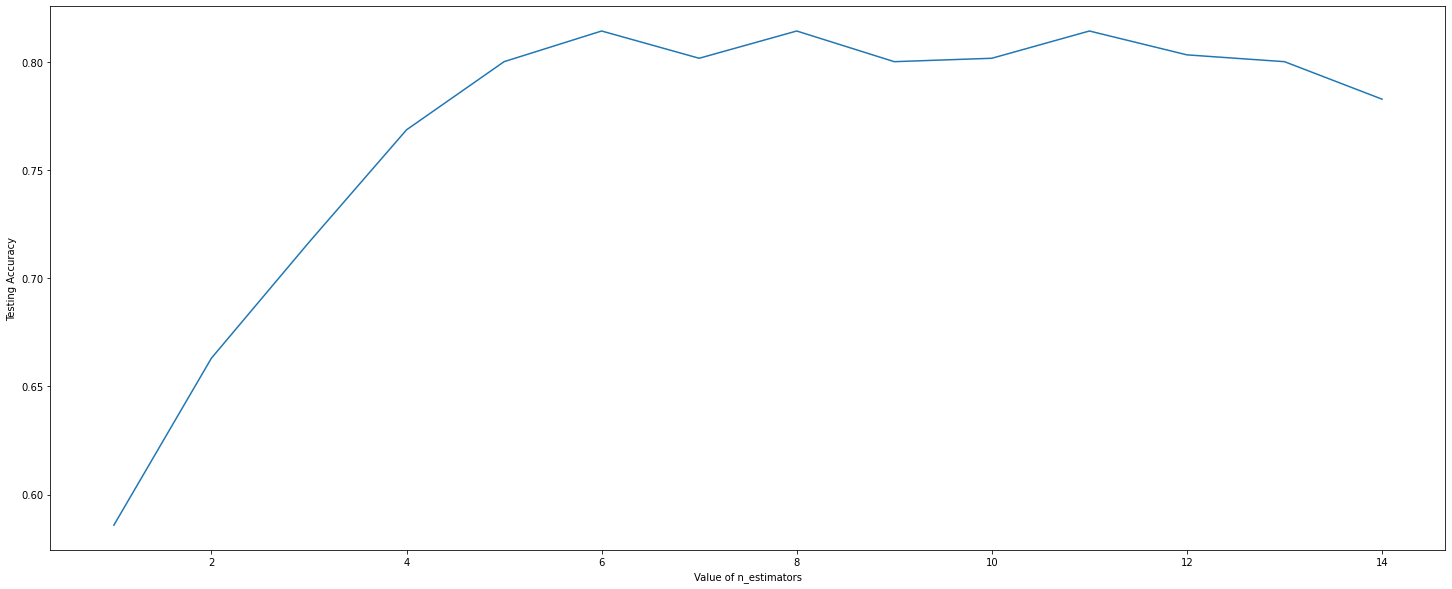

In [24]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
N=14
k_range = range (1,N+1)
scores={}
scores_list = []
for k in k_range:
  classifier = GradientBoostingClassifier(max_depth=k,random_state=0)
  classifier.fit(X_train, y_train)
  y_pred=classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))



%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best Depth:")
best_depth=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_depth)

In [25]:
from sklearn.ensemble import GradientBoostingClassifier

gradBoost_estimator = GradientBoostingClassifier(n_estimators=best_estimator,random_state=0)
gradBoost_estimator.fit(X_train, y_train)
y_pred = gradBoost_estimator.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(gradBoost_estimator,2,'GradientBoostingClassifier')]=accuracy_score(y_test, y_pred)

[[111  21  22   9]
 [ 12 107  11  15]
 [ 20  27 102  19]
 [  9   8  36 106]]
              precision    recall  f1-score   support

           0       0.73      0.68      0.70       163
           1       0.66      0.74      0.69       145
           2       0.60      0.61      0.60       168
           3       0.71      0.67      0.69       159

    accuracy                           0.67       635
   macro avg       0.67      0.67      0.67       635
weighted avg       0.67      0.67      0.67       635

Accurecy:  0.6708661417322834


In [26]:
from sklearn.ensemble import GradientBoostingClassifier

gradBoost_depth = GradientBoostingClassifier(max_depth=best_depth,random_state=0)
gradBoost_depth.fit(X_train, y_train)
y_pred = gradBoost_depth.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))

result[(gradBoost_depth,2,'GradientBoostingClassifier')]=accuracy_score(y_test, y_pred)

[[119  16  21   7]
 [  8 127   5   5]
 [ 17   8 132  11]
 [  5   1  14 139]]
              precision    recall  f1-score   support

           0       0.80      0.73      0.76       163
           1       0.84      0.88      0.86       145
           2       0.77      0.79      0.78       168
           3       0.86      0.87      0.87       159

    accuracy                           0.81       635
   macro avg       0.81      0.82      0.82       635
weighted avg       0.81      0.81      0.81       635

Accurecy:  0.8141732283464567


In [27]:
from sklearn.ensemble import GradientBoostingClassifier

gradBoost_all = GradientBoostingClassifier(n_estimators=best_estimator,max_depth=best_depth,random_state=0)
gradBoost_all.fit(X_train, y_train)
y_pred = gradBoost_all.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))

result[(gradBoost_all,2,'GradientBoostingClassifier')]=accuracy_score(y_test, y_pred)

[[120  16  18   9]
 [  7 123   8   7]
 [ 23  13 120  12]
 [  5   2  17 135]]
              precision    recall  f1-score   support

           0       0.77      0.74      0.75       163
           1       0.80      0.85      0.82       145
           2       0.74      0.71      0.73       168
           3       0.83      0.85      0.84       159

    accuracy                           0.78       635
   macro avg       0.78      0.79      0.79       635
weighted avg       0.78      0.78      0.78       635

Accurecy:  0.784251968503937




---



---



#Random Forest

In [28]:
from sklearn.ensemble import RandomForestClassifier
rf_default = RandomForestClassifier(random_state=0)
rf_default.fit(X_train, y_train)
y_pred=rf_default.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(rf_default,3,'RandomForestClassifier')]=accuracy_score(y_test, y_pred)

[[125  14  17   7]
 [  7 131   1   6]
 [ 17  10 133   8]
 [  2   3  13 141]]
              precision    recall  f1-score   support

           0       0.83      0.77      0.80       163
           1       0.83      0.90      0.86       145
           2       0.81      0.79      0.80       168
           3       0.87      0.89      0.88       159

    accuracy                           0.83       635
   macro avg       0.83      0.84      0.84       635
weighted avg       0.83      0.83      0.83       635

Accurecy:  0.8346456692913385


1/150 round completed......................... Accurecy: 0.5889763779527559
2/150 round completed......................... Accurecy: 0.6157480314960629
3/150 round completed......................... Accurecy: 0.6850393700787402
4/150 round completed......................... Accurecy: 0.7039370078740157
5/150 round completed......................... Accurecy: 0.7149606299212599
6/150 round completed......................... Accurecy: 0.7448818897637796
7/150 round completed......................... Accurecy: 0.7606299212598425
8/150 round completed......................... Accurecy: 0.75748031496063
9/150 round completed......................... Accurecy: 0.7779527559055118
10/150 round completed......................... Accurecy: 0.7763779527559055
11/150 round completed......................... Accurecy: 0.7763779527559055
12/150 round completed......................... Accurecy: 0.7858267716535433
13/150 round completed......................... Accurecy: 0.7889763779527559
14/150 rou

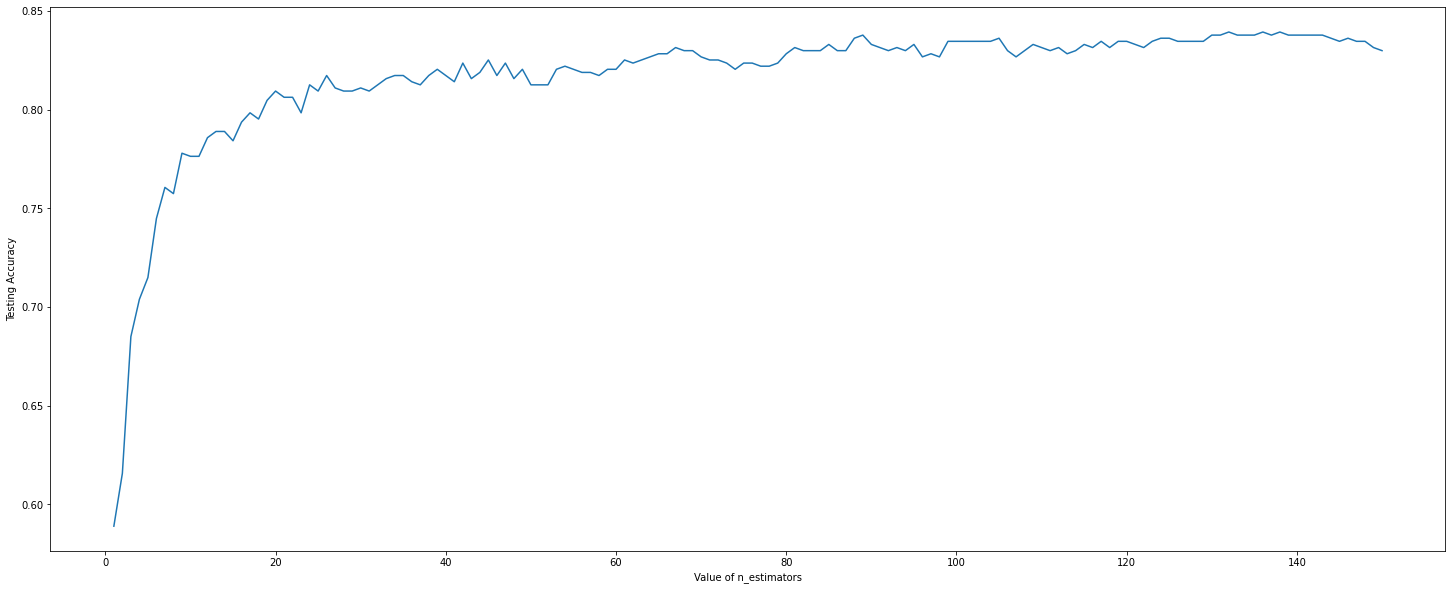

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
N=150
k_range = range (1,N+1)
scores={}
scores_list = []
for k in k_range:
  classifier = RandomForestClassifier(n_estimators=k,random_state=0)
  classifier.fit(X_train, y_train)
  y_pred=classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))



%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best n_estimators:")
best_estimator=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_estimator)

1/30 round completed......................... Accurecy: 0.47244094488188976
2/30 round completed......................... Accurecy: 0.48661417322834644
3/30 round completed......................... Accurecy: 0.5307086614173229
4/30 round completed......................... Accurecy: 0.5748031496062992
5/30 round completed......................... Accurecy: 0.6047244094488189
6/30 round completed......................... Accurecy: 0.658267716535433
7/30 round completed......................... Accurecy: 0.6834645669291338
8/30 round completed......................... Accurecy: 0.721259842519685
9/30 round completed......................... Accurecy: 0.7606299212598425
10/30 round completed......................... Accurecy: 0.7795275590551181
11/30 round completed......................... Accurecy: 0.7905511811023622
12/30 round completed......................... Accurecy: 0.8125984251968504
13/30 round completed......................... Accurecy: 0.815748031496063
14/30 round completed.

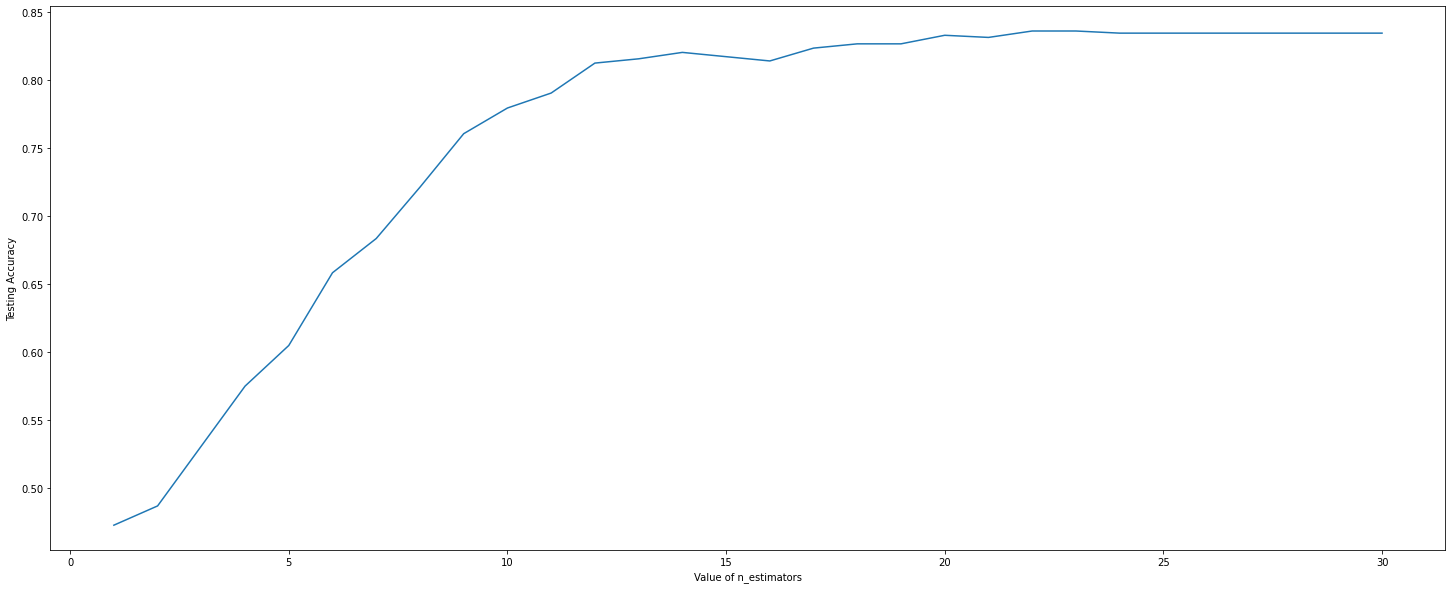

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
N=30
k_range = range (1,N+1)
scores={}
scores_list = []
for k in k_range:
  classifier = RandomForestClassifier(max_depth=k,random_state=0)
  classifier.fit(X_train, y_train)
  y_pred=classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))



%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best Depth:")
best_depth=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_depth)

In [31]:
from sklearn.ensemble import RandomForestClassifier
rf_estimator = RandomForestClassifier(n_estimators=best_estimator,random_state=0)
rf_estimator.fit(X_train, y_train)
y_pred=rf_estimator.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(rf_estimator,3,'RandomForestClassifier')]=accuracy_score(y_test, y_pred)

[[126  11  19   7]
 [  6 131   1   7]
 [ 17   9 134   8]
 [  2   3  12 142]]
              precision    recall  f1-score   support

           0       0.83      0.77      0.80       163
           1       0.85      0.90      0.88       145
           2       0.81      0.80      0.80       168
           3       0.87      0.89      0.88       159

    accuracy                           0.84       635
   macro avg       0.84      0.84      0.84       635
weighted avg       0.84      0.84      0.84       635

Accurecy:  0.8393700787401575


In [32]:
from sklearn.ensemble import RandomForestClassifier
rf_depth = RandomForestClassifier(max_depth=best_depth,random_state=0)
rf_depth.fit(X_train, y_train)
y_pred=rf_depth.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(rf_depth,3,'RandomForestClassifier')]=accuracy_score(y_test, y_pred)

[[126  12  18   7]
 [  7 131   1   6]
 [ 16  11 133   8]
 [  2   3  13 141]]
              precision    recall  f1-score   support

           0       0.83      0.77      0.80       163
           1       0.83      0.90      0.87       145
           2       0.81      0.79      0.80       168
           3       0.87      0.89      0.88       159

    accuracy                           0.84       635
   macro avg       0.84      0.84      0.84       635
weighted avg       0.84      0.84      0.84       635

Accurecy:  0.8362204724409449


In [33]:
from sklearn.ensemble import RandomForestClassifier
rf_all = RandomForestClassifier(n_estimators=best_estimator,max_depth=best_depth,random_state=0)
rf_all.fit(X_train, y_train)
y_pred=rf_all.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(rf_all,3,'RandomForestClassifier')]=accuracy_score(y_test, y_pred)

[[125  11  20   7]
 [  6 131   1   7]
 [ 17   9 134   8]
 [  2   3  13 141]]
              precision    recall  f1-score   support

           0       0.83      0.77      0.80       163
           1       0.85      0.90      0.88       145
           2       0.80      0.80      0.80       168
           3       0.87      0.89      0.88       159

    accuracy                           0.84       635
   macro avg       0.84      0.84      0.84       635
weighted avg       0.84      0.84      0.84       635

Accurecy:  0.8362204724409449




---



---



#XGB

In [34]:


import xgboost as xgb
xgb_deafult = xgb.XGBClassifier(random_state=0)
xgb_deafult.fit(X_train.values,y_train.values)
y_pred = xgb_deafult.predict(X_test.values)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(xgb_deafult,4,'xgboost')]=accuracy_score(y_test, y_pred)

[[110  18  25  10]
 [ 14 112  10   9]
 [ 23  21 106  18]
 [  6   6  30 117]]
              precision    recall  f1-score   support

           0       0.72      0.67      0.70       163
           1       0.71      0.77      0.74       145
           2       0.62      0.63      0.63       168
           3       0.76      0.74      0.75       159

    accuracy                           0.70       635
   macro avg       0.70      0.70      0.70       635
weighted avg       0.70      0.70      0.70       635

Accurecy:  0.7007874015748031


1/250 round completed......................... Accurecy: 0.5401574803149606
2/250 round completed......................... Accurecy: 0.5543307086614173
3/250 round completed......................... Accurecy: 0.5653543307086614
4/250 round completed......................... Accurecy: 0.573228346456693
5/250 round completed......................... Accurecy: 0.5795275590551181
6/250 round completed......................... Accurecy: 0.5748031496062992
7/250 round completed......................... Accurecy: 0.5779527559055118
8/250 round completed......................... Accurecy: 0.5968503937007874
9/250 round completed......................... Accurecy: 0.5952755905511811
10/250 round completed......................... Accurecy: 0.6094488188976378
11/250 round completed......................... Accurecy: 0.6062992125984252
12/250 round completed......................... Accurecy: 0.6173228346456693
13/250 round completed......................... Accurecy: 0.6157480314960629
14/250 ro

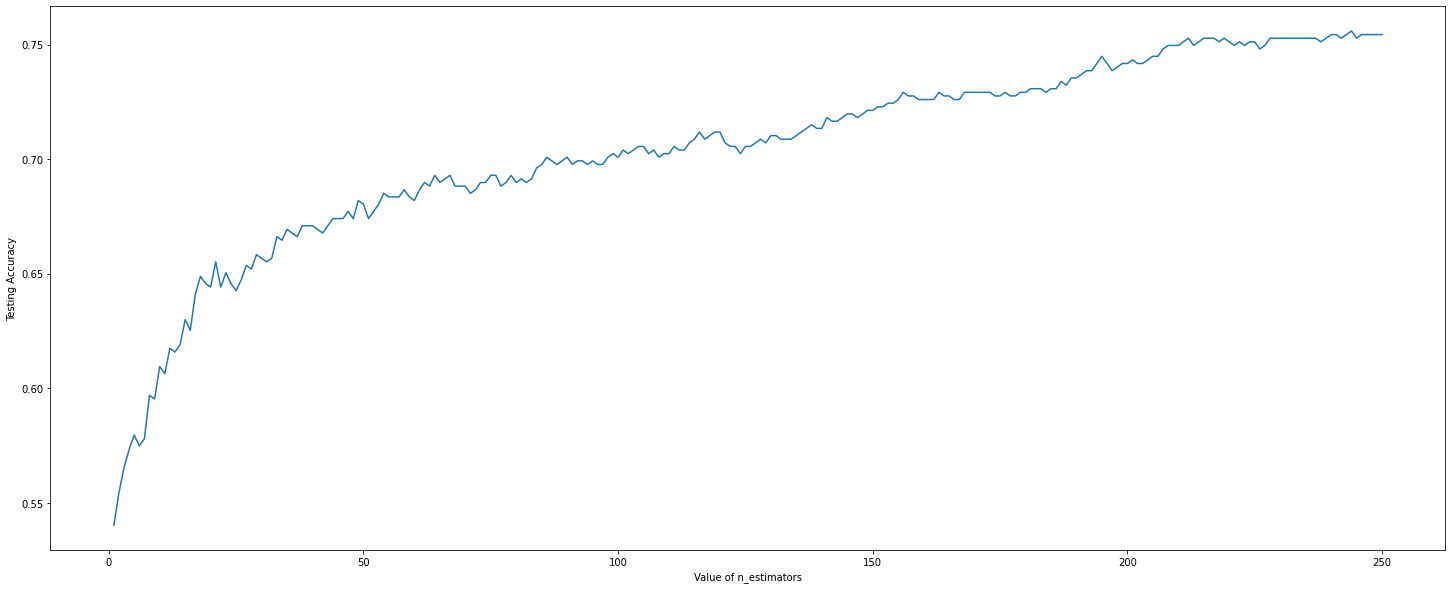

In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
N=250
k_range = range (1,N+1)
scores={}
scores_list = []
for k in k_range:
  xgb_classifier = xgb.XGBClassifier(n_estimators=k,random_state=0)
  xgb_classifier.fit(X_train.values, y_train.values)
  y_pred=xgb_classifier.predict(X_test.values)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))


%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best n_estimators:")
best_estimator=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_estimator)

1/30 round completed......................... Accurecy: 0.5858267716535434
2/30 round completed......................... Accurecy: 0.6566929133858268
3/30 round completed......................... Accurecy: 0.7007874015748031
4/30 round completed......................... Accurecy: 0.7511811023622047
5/30 round completed......................... Accurecy: 0.7795275590551181
6/30 round completed......................... Accurecy: 0.8015748031496063
7/30 round completed......................... Accurecy: 0.7984251968503937
8/30 round completed......................... Accurecy: 0.8283464566929134
9/30 round completed......................... Accurecy: 0.8236220472440945
10/30 round completed......................... Accurecy: 0.815748031496063
11/30 round completed......................... Accurecy: 0.8173228346456692
12/30 round completed......................... Accurecy: 0.8173228346456692
13/30 round completed......................... Accurecy: 0.8236220472440945
14/30 round completed.

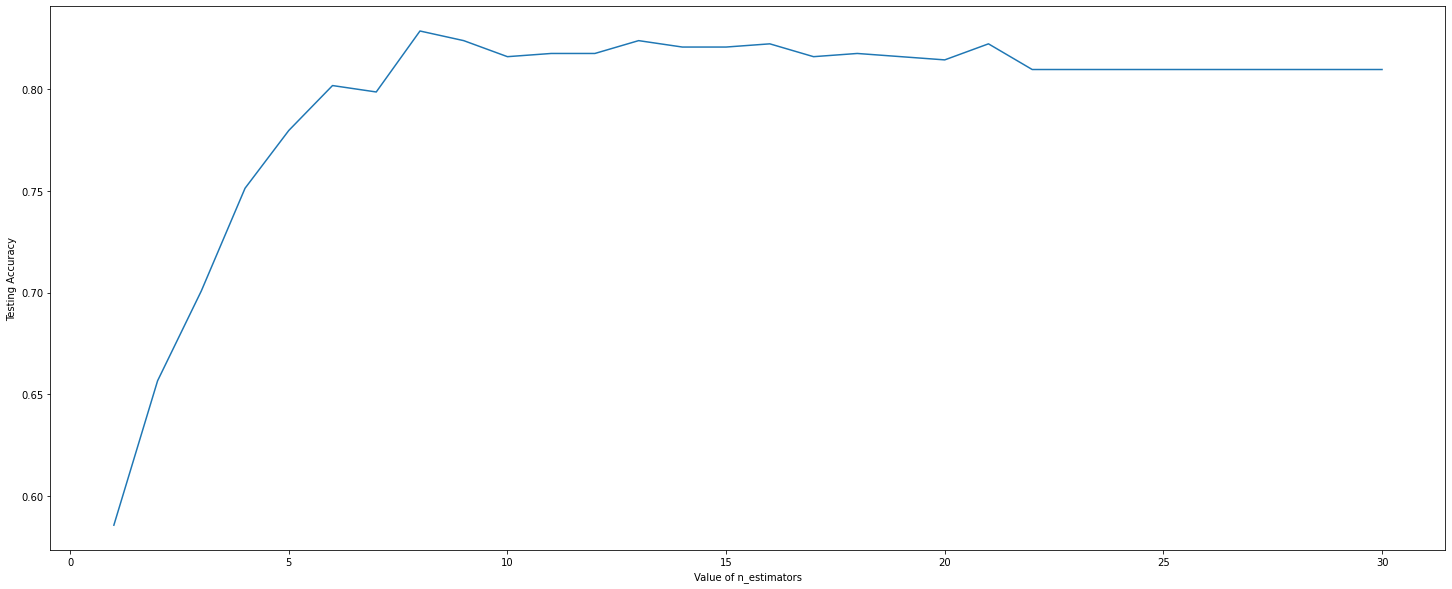

In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
N=30
k_range = range (1,N+1)
scores={}
scores_list = []
for k in k_range:
  xgb_classifier = xgb.XGBClassifier(max_depth=k,random_state=0)
  xgb_classifier.fit(X_train.values, y_train.values)
  y_pred=xgb_classifier.predict(X_test.values)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))


%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best depth:")
best_depth=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_depth)

In [ ]:
import xgboost as xgb
xgb_depth = xgb.XGBClassifier(max_depth=best_depth,random_state=0)
xgb_depth.fit(X_train.values,y_train.values)
y_pred = xgb_depth.predict(X_test.values)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(xgb_depth,4,'xgboost')]=accuracy_score(y_test, y_pred)
print(xgb_depth)

[[128   8  21   6]
 [  9 129   5   2]
 [ 20   9 131   8]
 [  4   4  13 138]]
              precision    recall  f1-score   support

           0       0.80      0.79      0.79       163
           1       0.86      0.89      0.87       145
           2       0.77      0.78      0.78       168
           3       0.90      0.87      0.88       159

    accuracy                           0.83       635
   macro avg       0.83      0.83      0.83       635
weighted avg       0.83      0.83      0.83       635

Accurecy:  0.8283464566929134
XGBClassifier(max_depth=8, objective='multi:softprob')


In [ ]:
import xgboost as xgb
xgb_estimator = xgb.XGBClassifier(n_estimators=best_estimator,random_state=0)
xgb_estimator.fit(X_train.values,y_train.values)
y_pred = xgb_estimator.predict(X_test.values)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(xgb_estimator,4,'xgboost')]=accuracy_score(y_test, y_pred)
print(xgb_estimator)

[[115  15  23  10]
 [ 10 122   7   6]
 [ 19  17 116  16]
 [  7   5  20 127]]
              precision    recall  f1-score   support

           0       0.76      0.71      0.73       163
           1       0.77      0.84      0.80       145
           2       0.70      0.69      0.69       168
           3       0.80      0.80      0.80       159

    accuracy                           0.76       635
   macro avg       0.76      0.76      0.76       635
weighted avg       0.76      0.76      0.76       635

Accurecy:  0.7559055118110236
XGBClassifier(n_estimators=244, objective='multi:softprob')


In [ ]:
import xgboost as xgb
xgb_all = xgb.XGBClassifier(n_estimators=best_estimator,max_depth=best_depth,random_state=0)
xgb_all.fit(X_train.values,y_train.values)
y_pred = xgb_all.predict(X_test.values)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(xgb_all,4,'xgboost')]=accuracy_score(y_test, y_pred)

[[130   8  20   5]
 [ 11 130   2   2]
 [ 21   7 132   8]
 [  4   2  11 142]]
              precision    recall  f1-score   support

           0       0.78      0.80      0.79       163
           1       0.88      0.90      0.89       145
           2       0.80      0.79      0.79       168
           3       0.90      0.89      0.90       159

    accuracy                           0.84       635
   macro avg       0.84      0.84      0.84       635
weighted avg       0.84      0.84      0.84       635

Accurecy:  0.8409448818897638


#KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_default = KNeighborsClassifier()
knn_default.fit(X_train, y_train)
y_pred=knn_default.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(knn_default,5,'KNeighborsClassifier')]=accuracy_score(y_test, y_pred)

[[ 73  42  20  28]
 [ 19 116   3   7]
 [ 26  21 103  18]
 [ 18  11  24 106]]
              precision    recall  f1-score   support

           0       0.54      0.45      0.49       163
           1       0.61      0.80      0.69       145
           2       0.69      0.61      0.65       168
           3       0.67      0.67      0.67       159

    accuracy                           0.63       635
   macro avg       0.63      0.63      0.62       635
weighted avg       0.63      0.63      0.62       635

Accurecy:  0.6267716535433071


1/105 round completed......................... Accurecy: 0.7559055118110236
2/105 round completed......................... Accurecy: 0.6866141732283465
3/105 round completed......................... Accurecy: 0.6787401574803149
4/105 round completed......................... Accurecy: 0.6566929133858268
5/105 round completed......................... Accurecy: 0.6267716535433071
6/105 round completed......................... Accurecy: 0.6094488188976378
7/105 round completed......................... Accurecy: 0.6015748031496063
8/105 round completed......................... Accurecy: 0.584251968503937
9/105 round completed......................... Accurecy: 0.5653543307086614
10/105 round completed......................... Accurecy: 0.5763779527559055
11/105 round completed......................... Accurecy: 0.5653543307086614
12/105 round completed......................... Accurecy: 0.5606299212598426
13/105 round completed......................... Accurecy: 0.5622047244094488
14/105 ro

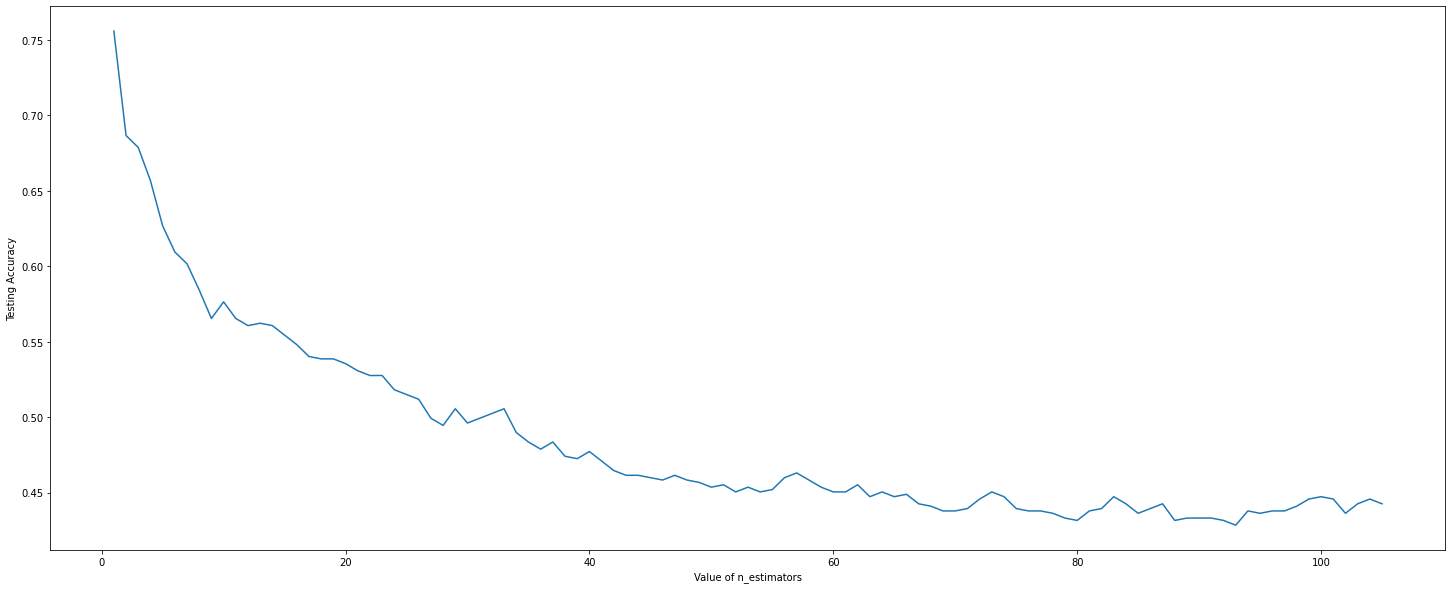

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
Neighbors=105
k_range = range (1,Neighbors+1)
scores={}
scores_list = []
for k in k_range:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train)
  y_pred=knn.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(Neighbors)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))


%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best Depth:")
best=list(scores.keys())[scores_list.index(max(scores_list))]
print(best)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_neighbors = KNeighborsClassifier(n_neighbors=best)
knn_neighbors.fit(X_train, y_train)
y_pred=knn_neighbors.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(knn_neighbors,5,'KNeighborsClassifier')]=accuracy_score(y_test, y_pred)

#NB

In [ ]:
from sklearn.naive_bayes import GaussianNB

nb_deafult = GaussianNB()
nb_deafult.fit(X_train, y_train)
y_pred = nb_deafult.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(nb_deafult,6,'GaussianNB')]=accuracy_score(y_test, y_pred)

[[116  38   7   2]
 [ 63  77   4   1]
 [ 54  52  60   2]
 [ 65  50  26  18]]
              precision    recall  f1-score   support

           0       0.39      0.71      0.50       163
           1       0.35      0.53      0.43       145
           2       0.62      0.36      0.45       168
           3       0.78      0.11      0.20       159

    accuracy                           0.43       635
   macro avg       0.54      0.43      0.39       635
weighted avg       0.54      0.43      0.40       635

Accurecy:  0.4267716535433071




---



---



#Result

In [ ]:

models=[]

for i in result:
  models.append(i[0])
  print(i[0],i[1]," : ",result[i])
  print("---------------------------------------------------------------")
  print()


In [ ]:
sorted_list=[]
sorted_list = sorted(result, key=result.get,reverse=True)

for i in sorted_list:
  print(i,"  : ",result[i])
  print("-------------------------------------------------------------------------------------------------")

print(sorted_list)


flage=[]
best_models=[]
it=0

for i in sorted_list:
  if it==4:
    break

  if i[1] not in flage:
    best_models.append((i[0],i[2]))
    flage.append(i[1])
    it+=1


In [ ]:
print("best_models:")
for i in best_models:
  print(i)


In [ ]:
len(best_models)

#Performance parameter for each class

In [ ]:

def confusion_details(y_test,y_pred):
    labels = list(set(y_test))
    labels.sort()

    print("Total labels: %s -> %s" % (len(labels), labels))

    df = pd.DataFrame(
        data=confusion_matrix(y_test, y_pred, labels=labels),
        columns=labels,
        index=labels
    )

    print(df)

    print()
    print("----------------------------------------------------------------------------------------")
    print("----------------------------------------------------------------------------------------")
    print()
    #
    # Local (metrics per class)
    #
    tps = {}
    fps = {}
    fns = {}
    tns = {}

    precision_local = {}
    recall_local = {}
    f1_local = {}
    accuracy_local = {}
    specificity_local={}

    for label in labels:
        tps[label] = df.loc[label, label]
        fps[label] = df[label].sum() - tps[label]
        fns[label] = df.loc[label].sum() - tps[label]
        tns[label]=len(y_test) - (tps[label] + fps[label] + fns[label])
        
        tp, fp, fn, tn = tps[label], fps[label], fns[label], tns[label]
        
        precision_local[label] = tp / (tp + fp) if (tp + fp) > 0. else 0.
        specificity_local[label] = tn / (tn + fp) if (tn + fp) > 0. else 0.
        recall_local[label] = tp / (tp + fn) if (tp + fp) > 0. else 0.
        p, r = precision_local[label], recall_local[label]
        
        f1_local[label] = 2. * p * r / (p + r) if (p + r) > 0. else 0.
        accuracy_local[label] = tp / (tp + fp + fn) if (tp + fp + fn) > 0. else 0.



    print("#-- Local measures --#")
    print("True Positives(TP):", tps)
    print("False Positives(FP):", fps)
    print("True Negatives(TN):", tns)
    print("False Negatives(FN):", fns)
    print("----------------------------")

    print("Precision:", precision_local)
    print("Recall/Sensitivity:", recall_local)
    print("Specificity:",specificity_local)
    print("F1-Score:", f1_local)
    print("Accuracy:", accuracy_local)


    print()
    print("----------------------------------------------------------------------------------------")
    print("----------------------------------------------------------------------------------------")
    print()
    #
    # Global
    #
    micro_averages = {}
    macro_averages = {}

    correct_predictions = sum(tps.values())
    true_negative=sum(tns.values())

    den = sum(list(tps.values()) + list(fps.values()))
    micro_averages["Precision"] = 1. * correct_predictions / den if den > 0. else 0.

    den = sum(list(tps.values()) + list(fns.values()))
    micro_averages["Recall"] = 1. * correct_predictions / den if den > 0. else 0.

    den = sum(list(tns.values()) + list(fps.values()))
    micro_averages["Specificity"] = 1. * true_negative / den if den > 0. else 0.


    micro_avg_p, micro_avg_r = micro_averages["Precision"], micro_averages["Recall"]
    micro_averages["F1-score"] = 2. * micro_avg_p * micro_avg_r / (micro_avg_p + micro_avg_r) if (micro_avg_p + micro_avg_r) > 0. else 0.

    macro_averages["Precision"] = np.mean(list(precision_local.values()))
    macro_averages["Recall"] = np.mean(list(recall_local.values()))
    macro_averages["Specificity"]=np.mean(list(specificity_local.values()))


    macro_avg_p, macro_avg_r = macro_averages["Precision"], macro_averages["Recall"]
    macro_averages["F1-Score"] = 2. * macro_avg_p * macro_avg_r / (macro_avg_p + macro_avg_r) if (macro_avg_p + macro_avg_r) > 0. else 0.

    total_predictions = df.values.sum()
    accuracy_global = correct_predictions / total_predictions if total_predictions > 0. else 0.

    print("#-- Global measures --#")
    print("Micro-Averages:", micro_averages)
    print("Macro-Averages:", macro_averages)
    print("Correct predictions:", correct_predictions)
    print("Total predictions:", total_predictions)
    print("Accuracy:", accuracy_global)


    print()
    print("----------------------------------------------------------------------------------------")
    print("----------------------------------------------------------------------------------------")
    print()



    accuracy_local_new = {}
    for label in labels:
        tp, fp, fn, tn = tps[label], fps[label], fns[label], tns[label]
        accuracy_local_new[label] = (tp + tn) / (tp + fp + fn + tn) if (tp + fp + fn + tn) > 0. else 0.

    total_true = sum(list(tps.values()) + list(tns.values()))
    total_predictions = sum(list(tps.values()) + list(tns.values()) + list(fps.values()) + list(fns.values()))
    accuracy_global_new = 1. * total_true / total_predictions if total_predictions > 0. else 0.

    print("Accuracy (per class), with TNs:", accuracy_local_new)
    print("Accuracy (per class), without TNs:", accuracy_local)
    print("Accuracy (global), with TNs:", accuracy_global_new)
    print("Accuracy (global), without TNs:", accuracy_global)

In [ ]:
new_keys_10=models_check_box(models)

In [ ]:
for i in range(len(new_keys_10)):
  if new_keys_10[i].value ==True:
    print("\n")
    print("_________________________________________________",models[i],"_______________________________________________")

    if str(models[i])[:3] == "XGB":
      y_pred = models[i].predict(X_test.values)
      confusion_details(y_test,y_pred)
    
    else:
      y_pred = models[i].predict(X_test)
      confusion_details(y_test,y_pred)
    print('\n')
    print("-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------")
    print("-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------")
    print("-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------")
    print('\n')
    print('\n')

#Testing Accuracy For Best 4 Models

In [46]:

for i in best_models:
  print("--------------------------------------------------")
  print()
  if str(i[0])[:3] == "XGB":
    y_pred=i[0].predict(X_test.values)
  else:
    y_pred=i[0].predict(X_test)
  print(confusion_matrix(y_test, y_pred))
  print(classification_report(y_test,y_pred))
  print("Accurecy: ",accuracy_score(y_test, y_pred))

--------------------------------------------------

[[126  11  19   7]
 [ 10 130   3   2]
 [ 21  11 125  11]
 [  4   1  10 144]]
              precision    recall  f1-score   support

           0       0.78      0.77      0.78       163
           1       0.85      0.90      0.87       145
           2       0.80      0.74      0.77       168
           3       0.88      0.91      0.89       159

    accuracy                           0.83       635
   macro avg       0.83      0.83      0.83       635
weighted avg       0.83      0.83      0.83       635

Accurecy:  0.8267716535433071
--------------------------------------------------

[[122  10  23   8]
 [ 11 129   3   2]
 [ 22  13 119  14]
 [  6   0   9 144]]
              precision    recall  f1-score   support

           0       0.76      0.75      0.75       163
           1       0.85      0.89      0.87       145
           2       0.77      0.71      0.74       168
           3       0.86      0.91      0.88       159

    a

#SHAP

In [ ]:
!pip install shap
import shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 575 kB 8.2 MB/s 


In [ ]:

def SHAP_EXP(model,graph_feat):
  print("Models: ",model)

  explainer = shap.Explainer(model.predict, X_test)

  shap_values1 = explainer(X_test)
  features_names=list_of_feat

  if 'Subjects' in features_names:
    features_names.pop(0)


  shap.plots.bar(shap_values1,max_display=graph_feat["max_display"])

  print("---------------------")

  shap.summary_plot(shap_values1,max_display=graph_feat["max_display"],feature_names=features_names)

  print("---------------------")

  print("Local Explaination")
  shap.plots.waterfall(shap_values1[graph_feat["shap_values Index"]],max_display=graph_feat["max_display"])


  print("---------------------")

  shap.plots.bar(shap_values1[graph_feat["shap_values Index"]],max_display=graph_feat["max_display"])

In [ ]:
new_keys_7=models_check_box(models)

Checkbox(value=False, description='AdaBoostClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='AdaBoostClassifier(n_estimators=39, random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(n_estimators=41, random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(max_depth=11, random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(max_depth=11, n_estimators=41, random_state=0)',…

Checkbox(value=False, description='RandomForestClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(n_estimators=124, random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(max_depth=18, random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(max_depth=18, n_estimators=124, random_state=0)', in…

Checkbox(value=False, description="XGBClassifier(objective='multi:softprob')", indent=False)

Checkbox(value=False, description="XGBClassifier(max_depth=15, objective='multi:softprob')", indent=False)

Checkbox(value=False, description="XGBClassifier(n_estimators=233, objective='multi:softprob')", indent=False)

Checkbox(value=False, description="XGBClassifier(max_depth=15, n_estimators=233, objective='multi:softprob')",…

Checkbox(value=False, description='KNeighborsClassifier()', indent=False)

Checkbox(value=False, description='KNeighborsClassifier(n_neighbors=1)', indent=False)

Checkbox(value=False, description='GaussianNB()', indent=False)

In [ ]:
graph_feat={
    "max_display":20,
    "shap_values Index":2
}

for i in range(len(new_keys_7)):
  if new_keys_7[i].value ==True:
    SHAP_EXP(models[i],graph_feat)
    print("---------------------------------------------------------")
    print("---------------------------------------------------------")
    print("---------------------------------------------------------")
    print("---------------------------------------------------------")

#Confusion Matrix For Testing

In [ ]:
new_keys_6=models_check_box(models)

Checkbox(value=False, description='AdaBoostClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='AdaBoostClassifier(n_estimators=39, random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(n_estimators=41, random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(max_depth=11, random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(max_depth=11, n_estimators=41, random_state=0)',…

Checkbox(value=False, description='RandomForestClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(n_estimators=124, random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(max_depth=18, random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(max_depth=18, n_estimators=124, random_state=0)', in…

Checkbox(value=False, description="XGBClassifier(objective='multi:softprob')", indent=False)

Checkbox(value=False, description="XGBClassifier(max_depth=15, objective='multi:softprob')", indent=False)

Checkbox(value=False, description="XGBClassifier(n_estimators=233, objective='multi:softprob')", indent=False)

Checkbox(value=False, description="XGBClassifier(max_depth=15, n_estimators=233, objective='multi:softprob')",…

Checkbox(value=False, description='KNeighborsClassifier()', indent=False)

Checkbox(value=False, description='KNeighborsClassifier(n_neighbors=1)', indent=False)

Checkbox(value=False, description='GaussianNB()', indent=False)

In [ ]:

from yellowbrick.classifier import ConfusionMatrix


for i in range(len(new_keys_6)):
  if new_keys_6[i].value ==True:
    cm = ConfusionMatrix(models[i], classes=['Reading', 'Resting', 'Walking', 'Working'])

    cm.fit(X_train, y_train)
    cm.score(X_test, y_test)
    cm.show()

#Confusion Matrix For Training

In [ ]:
new_keys_5=models_check_box(models)

Checkbox(value=False, description='AdaBoostClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='AdaBoostClassifier(n_estimators=39, random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(n_estimators=41, random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(max_depth=11, random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(max_depth=11, n_estimators=41, random_state=0)',…

Checkbox(value=False, description='RandomForestClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(n_estimators=124, random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(max_depth=18, random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(max_depth=18, n_estimators=124, random_state=0)', in…

Checkbox(value=False, description="XGBClassifier(objective='multi:softprob')", indent=False)

Checkbox(value=False, description="XGBClassifier(max_depth=15, objective='multi:softprob')", indent=False)

Checkbox(value=False, description="XGBClassifier(n_estimators=233, objective='multi:softprob')", indent=False)

Checkbox(value=False, description="XGBClassifier(max_depth=15, n_estimators=233, objective='multi:softprob')",…

Checkbox(value=False, description='KNeighborsClassifier()', indent=False)

Checkbox(value=False, description='KNeighborsClassifier(n_neighbors=1)', indent=False)

Checkbox(value=False, description='GaussianNB()', indent=False)

In [ ]:

for i in range(len(new_keys_5)):
  if new_keys_5[i].value ==True:
    cm = ConfusionMatrix(models[i], classes=['Reading', 'Resting', 'Walking', 'Working'])

    cm.fit(X_train, y_train)
    cm.score(X_train, y_train)
    cm.show()
    print("-------------------------------")
    print("-------------------------------")

#ROC FOR MULTICLASS

In [52]:
!pip install plotly==5.11.0
!pip install -U kaleido


import plotly.graph_objects as go
import plotly.express as px
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
import pandas as pd
import matplotlib.pyplot as plt

def ploty_ROC(model,X,y,fig_name):
    
    lebel_dict={
    0: 'Reading',
    1: 'Resting',
    2: 'Walking',
    3: 'Working'
    }
    if str(model)[:3] == "XGB":
      y_scores = model.predict_proba(X.values)
    else:
      y_scores = model.predict_proba(X)
    #y_scores = model.predict_proba(X)

    y_onehot = pd.get_dummies(y, columns=model.classes_)

    fig = go.Figure()
    fig.add_shape(
        type='line', line=dict(dash='dash'),
        x0=0, x1=1, y0=0, y1=1
    )

    for i in range(y_scores.shape[1]):
        y_true = y_onehot.iloc[:, i]
        y_score = y_scores[:, i]

        fpr, tpr, _ = roc_curve(y_true, y_score)
        auc_score = roc_auc_score(y_true, y_score)
        name = f"{lebel_dict[y_onehot.columns[i]]} (AUC={auc_score:.2f})"
        fig.add_trace(go.Scatter(x=fpr, y=tpr, name=name, mode='lines'))

    fig.update_layout(
        xaxis_title='False Positive Rate',
        yaxis_title='True Positive Rate',
        yaxis=dict(scaleanchor="x", scaleratio=1),
        xaxis=dict(constrain='domain'),
        width=1000, height=1000,
        font=dict(
            family="Courier New, monospace",
            size=20,
            color="BLack"
        ),
        legend=dict(
            x=0.67,
            y=0.05,
            traceorder="reversed",
            title_font_family="Times New Roman",
            font=dict(
                family="Courier New, monospace",
                size=20,
                color="black"
            ),
            bgcolor="LightSteelBlue",
            bordercolor="White",
            borderwidth=2
        )
    )
    fig.show()
    fig.write_image(fig_name+".png")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [48]:
new_keys_9=models_check_box(models)

Checkbox(value=False, description='AdaBoostClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='AdaBoostClassifier(n_estimators=40, random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(n_estimators=147, random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(max_depth=15, random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(max_depth=15, n_estimators=147, random_state=0)', in…

Checkbox(value=False, description="XGBClassifier(objective='multi:softprob')", indent=False)

Checkbox(value=False, description="XGBClassifier(max_depth=10, objective='multi:softprob')", indent=False)

Checkbox(value=False, description="XGBClassifier(n_estimators=250, objective='multi:softprob')", indent=False)

Checkbox(value=False, description="XGBClassifier(max_depth=10, n_estimators=250, objective='multi:softprob')",…

Checkbox(value=False, description='KNeighborsClassifier()', indent=False)

Checkbox(value=False, description='KNeighborsClassifier(n_neighbors=1)', indent=False)

Checkbox(value=False, description='GaussianNB()', indent=False)

In [53]:
for i in range(len(new_keys_9)):
  if new_keys_9[i].value ==True:
    print(models[i])
    ploty_ROC(models[i],X_new,y_new,str(models[i]))
    print("---------------------------------------------------------")
    print("---------------------------------------------------------")
    print("---------------------------------------------------------")
    print("---------------------------------------------------------")

AdaBoostClassifier(n_estimators=40, random_state=0)


---------------------------------------------------------
---------------------------------------------------------
---------------------------------------------------------
---------------------------------------------------------
RandomForestClassifier(n_estimators=147, random_state=0)


---------------------------------------------------------
---------------------------------------------------------
---------------------------------------------------------
---------------------------------------------------------
XGBClassifier(objective='multi:softprob')


---------------------------------------------------------
---------------------------------------------------------
---------------------------------------------------------
---------------------------------------------------------
KNeighborsClassifier()


---------------------------------------------------------
---------------------------------------------------------
---------------------------------------------------------
---------------------------------------------------------
GaussianNB()


---------------------------------------------------------
---------------------------------------------------------
---------------------------------------------------------
---------------------------------------------------------


#Cross_val_score function

In [ ]:
from sklearn.model_selection import cross_val_score

k=5
for i in result:
  print(i[0]," -> Accuracy: ",result[i])
  l=list(cross_val_score(i[0],X_new, y_new,cv=k))
  avg=sum(l)/k
  print(i[0]," -> AVG Accurecy After CV: "+str(avg)+ " (For "+str(k)+" Fold)")
  print("--------------------------------------------------------------------------")

In [56]:
 l=list(cross_val_score(AdaBoostClassifier(random_state=0),X_new, y_new,cv=5))

In [57]:
import numpy as np
from scipy import interp
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold


cv = StratifiedKFold(n_splits=6)
classifier = svm.SVC(kernel='linear', probability=True,
                     random_state=random_state)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

i = 0
for train, test in cv.split(X, y):
    probas_ = classifier.fit(X[train], y[train]).predict_proba(X[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y[test], probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

    i += 1
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Luck', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

[0.431496062992126,
 0.5543307086614173,
 0.5757097791798107,
 0.6009463722397477,
 0.613564668769716]

In [55]:
result

{(AdaBoostClassifier(random_state=0),
  1,
  'AdaBoostClassifier'): 0.5763779527559055,
 (AdaBoostClassifier(n_estimators=40, random_state=0),
  1,
  'AdaBoostClassifier'): 0.5811023622047244,
 (RandomForestClassifier(random_state=0),
  3,
  'RandomForestClassifier'): 0.7937007874015748,
 (RandomForestClassifier(n_estimators=147, random_state=0),
  3,
  'RandomForestClassifier'): 0.8078740157480315,
 (RandomForestClassifier(max_depth=15, random_state=0),
  3,
  'RandomForestClassifier'): 0.8094488188976378,
 (RandomForestClassifier(max_depth=15, n_estimators=147, random_state=0),
  3,
  'RandomForestClassifier'): 0.8047244094488188,
 (XGBClassifier(objective='multi:softprob'), 4, 'xgboost'): 0.7023622047244095,
 (XGBClassifier(max_depth=10, objective='multi:softprob'),
  4,
  'xgboost'): 0.8267716535433071,
 (XGBClassifier(n_estimators=250, objective='multi:softprob'),
  4,
  'xgboost'): 0.7559055118110236,
 (XGBClassifier(max_depth=10, n_estimators=250, objective='multi:softprob'),
  

###CV ROC (On working)

# **LIME**

In [40]:
!pip install lime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 275 kB 4.7 MB/s 
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283857 sha256=ba5f26a9fdb64744ec0901666dd05dd755ffb3557ec092582b321d822da3543b
  Stored in directory: /root/.cache/pip/wheels/e6/a6/20/cc1e293fcdb67ede666fed293cb895395e7ecceb4467779546
Successfully built lime


In [96]:

  def LIME_EXP(model,row):
    import lime
    from lime import lime_tabular


    if str(model)[:3] == "XGB":

      """explainer = lime.lime_tabular.LimeTabularExplainer(
        X_train.values,
        feature_names=list(list(X_new.columns)),                                         
        class_names=['Reading', 'Resting', 'Walking', 'Working']
        )
      
      exp = explainer.explain_instance(X_test.iloc[row, :].values,
                                 model.predict_proba,
                                 num_features=6,
                                 top_labels=2)"""
      print("Plz RUN XGboost cell....")
      return None



    else:
      explainer = lime_tabular.LimeTabularExplainer(
        training_data=np.array(X_train),
        feature_names=list(X_new.columns),
        class_names=['Reading', 'Resting', 'Walking', 'Working'],
        mode='classification'
        )

      exp = explainer.explain_instance(X_test.iloc[row],
                                      model.predict_proba,               
                                      num_features=6,
                                      top_labels=4)
    


    exp.show_in_notebook(show_table=True, show_all=True)



    import matplotlib.pyplot as plt
    with plt.style.context("ggplot"):
        exp.as_pyplot_figure()


    from IPython.display import HTML
    html_data = exp.as_html()
    HTML(data=html_data)

    exp.save_to_file(str(model)+".html")

In [93]:
row = int(input("Enter the index of row to explain: "))      # the index of row to be explained in LIME


new_keys_8=models_check_box(models)

Enter the index of row to explain: 8


Checkbox(value=False, description="XGBClassifier(objective='multi:softprob')", indent=False)

Checkbox(value=False, description="XGBClassifier(max_depth=18, objective='multi:softprob')", indent=False)

Checkbox(value=False, description="XGBClassifier(n_estimators=250, objective='multi:softprob')", indent=False)

Checkbox(value=False, description="XGBClassifier(max_depth=18, n_estimators=250, objective='multi:softprob')",…

Checkbox(value=False, description='AdaBoostClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='AdaBoostClassifier(n_estimators=47, random_state=0)', indent=False)

Checkbox(value=False, description="XGBClassifier(objective='multi:softprob')", indent=False)

Checkbox(value=False, description="XGBClassifier(max_depth=18, objective='multi:softprob')", indent=False)

Checkbox(value=False, description="XGBClassifier(n_estimators=250, objective='multi:softprob')", indent=False)

Checkbox(value=False, description="XGBClassifier(max_depth=18, n_estimators=250, objective='multi:softprob')",…

Checkbox(value=False, description='AdaBoostClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='AdaBoostClassifier(n_estimators=47, random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(n_estimators=82, random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(max_depth=13, random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(max_depth=13, n_estimators=82, random_state=0)', ind…

Checkbox(value=False, description='KNeighborsClassifier()', indent=False)

Checkbox(value=False, description='KNeighborsClassifier(n_neighbors=1)', indent=False)

Checkbox(value=False, description='GaussianNB()', indent=False)

In [98]:
for i in range(len(new_keys_8)):
  if new_keys_8[i].value ==True:
    print(models[i])
    LIME_EXP(models[i],row)
    print("---------------------------------------------------------")
    print("---------------------------------------------------------")
    print("---------------------------------------------------------")
    print("---------------------------------------------------------")

Output hidden; open in https://colab.research.google.com to view.

### LIME for XGboost

In [55]:
row = 18  ## the index of row to be explained in LIME

import lime
from lime import lime_tabular
explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values,
                                                   feature_names=list(list(X_new.columns)),
                                                   class_names=['Reading', 'Resting', 'Walking', 'Working'])

####Default

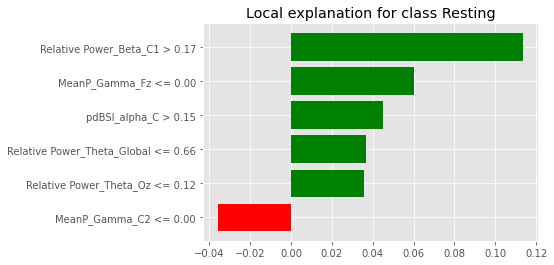

In [56]:

exp = explainer.explain_instance(X_test.iloc[row, :].values,
                                 xgb_deafult.predict_proba,
                                 num_features=6,
                                 top_labels=4)

exp.show_in_notebook(show_table=True, show_all=False)

import matplotlib.pyplot as plt
with plt.style.context("ggplot"):
    exp.as_pyplot_figure()


from IPython.display import HTML
html_data = exp.as_html()
HTML(data=html_data)

exp.save_to_file(str(xgb_deafult)+".html")

####Best Max Depth

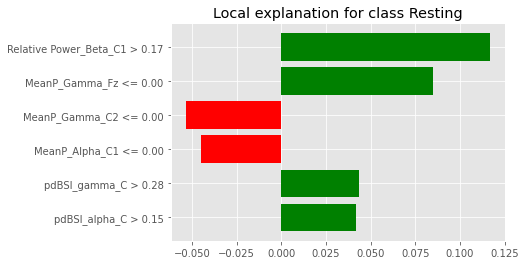

In [57]:

exp = explainer.explain_instance(X_test.iloc[row, :].values,
                                 xgb_depth.predict_proba,
                                 num_features=6,
                                 top_labels=4)

exp.show_in_notebook(show_table=True, show_all=False)

import matplotlib.pyplot as plt
with plt.style.context("ggplot"):
    exp.as_pyplot_figure()


from IPython.display import HTML
html_data = exp.as_html()
HTML(data=html_data)

exp.save_to_file(str(xgb_depth)+".html")

####Best N Estimator

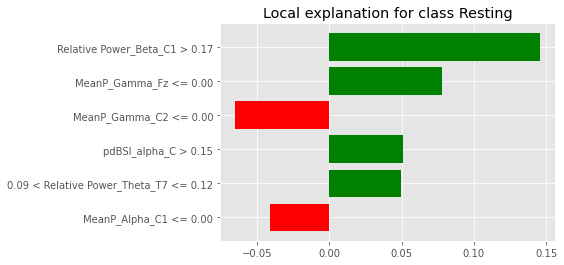

In [58]:


exp = explainer.explain_instance(X_test.iloc[row, :].values,
                                 xgb_estimator.predict_proba,
                                 num_features=6,
                                 top_labels=4)

exp.show_in_notebook(show_table=True, show_all=False)

import matplotlib.pyplot as plt
with plt.style.context("ggplot"):
    exp.as_pyplot_figure()


from IPython.display import HTML
html_data = exp.as_html()
HTML(data=html_data)

exp.save_to_file(str(xgb_estimator)+".html")

####Best Depth and Best Estimator

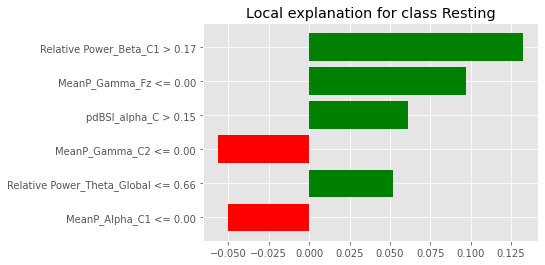

In [59]:

exp = explainer.explain_instance(X_test.iloc[row, :].values,
                                 xgb_all.predict_proba,
                                 num_features=6,
                                 top_labels=4)

exp.show_in_notebook(show_table=True, show_all=False)


import matplotlib.pyplot as plt
with plt.style.context("ggplot"):
    exp.as_pyplot_figure()


from IPython.display import HTML
html_data = exp.as_html()
HTML(data=html_data)

exp.save_to_file(str(xgb_all)+".html")